# Time Series Analysis

> Practical Time Series Analysis  - Forecasting Individual Household Electric Power Consumption. We'll explore and build time series forecasting models for measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years.

- author: Victor Omondi
- toc: true
- comments: true
- image:

# Libraries

In [1]:
%matplotlib inline

In [49]:
# WARNINGS
import warnings

# EXPLORATION AND MANIPULATION
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

## Libraries Configuration

In [3]:
# Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Matplotlib settings
plt.style.use('fivethirtyeight')

# Basics of Time Series

We will explore time series, how it allows for the analysis of important patterns that occur, such as trends and seasonality and how it can be used to forecast future values like GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc.

##  Introduction

Climate change is a major environmental policy challenge. Understanding the shape of damage functions is critical to improving integrated assessment models (IAMs) used to estimate the social cost of carbon. Such estimates underpin policies to reduce greenhouse gas emissions, and foster adaptive behaviors. Among the categories of damages, incremental cooling consumption in the power sector is often recognized as a top component. Given the rise of smart electricity meters, and the wide adoption of electricity generation technology like solar panels, there is a wealth of electricity usage data available. This data represents a multivariate time series of power-related variables which could in turn be used to model, and even forecast future electricity consumption.

Machine learning algorithms predict a single value, and cannot be used directly for multi-step forecasting. Two strategies that can be used to make multi-step forecasts with machine learning algorithms are, the recursive and the direct methods. We’ll explore and build time series forecasting models, for measurements of electric power consumption in one household, with a one-minute sampling rate, over a period of almost 4 years.

## Component of a Time Series

Time series is a collection of well-defined data points obtained sequentially over a set time period, usually taken at equal time intervals. Time series allows for the analysis of important patterns that occur, such as trends and seasonality. Depending on the domain of application, time series analysis can be used to forecast future values like GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc. Trend (T), Seasonality(S), Cyclic variations (C) and Random or Irregular movements (I) are all components of a time series.

- **Trend:**  this a long term movement observed in time series that changes over time, which can either be positive (increasing) or negative (decreasing). 
- **Seasonality:**  it is a periodic fluctuation that occurs in time series where predictable and regular patterns are exhibited at intervals; usually during a 12 month period. These fluctuations can be hourly, daily, weekly, monthly, or quarterly; they may be caused by seasons, habits, weather, traditions etc.
- **Cyclic variations** : these are oscillations occurring around a given trend in time series. The duration of a cycle varies based on the domain and business being analysed. The length of a cycle is described as the period.
- **Irregular movements:**  This is the residual after trend and seasonality have been removed from a time series. These are irregular variations that are unforeseen; cannot be predicted; and unlikely to be repeated.

## Time Series and Stochastic Process

A stochastic process is a statistical occurrence that consists of a collection of random variables ordered in time. Stochastic processes are often used in modelling time series data and considered to generate an infinite collection of all possible time series that may have been observed. One realization of a stochastic process is  considered an observed time series while an ensemble of a stochastic process is a statistical population.

## Concept of Stationary and Seasonality

A stationary time series is one where the statistical properties, such as mean and variance, do not change over time. This means that a stationary time series does not have any periodic fluctuations or trend. Many methods and tools for time series analysis have an underlying assumption that the time series is stationary. Hence, it is common to transform a non-stationary time series to stationary, by differencing to remove trend and seasonality.

### Stationary time series

![image.png](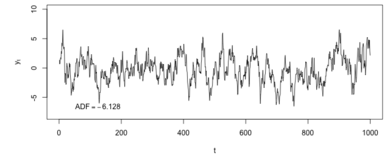 "Stationary time series")

### Non-stationary time series

![image.png](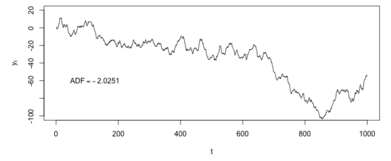 "Non-stationary time series")

## Model Parsimony

The principle of parsimony which is attributed to an English philosopher, William of Occam, suggests that given a set of equally good explanations for a phenomenon, the correct answer is the simplest explanation. Similarly in statistical modelling, a parsimonious model is one that has a great explanatory predictive power, and explains data with the minimum number of predictor variables or parameters. These models have just the right amount of predictors required to explain the model. As such, linear models are more preferable than non-linear models; experiments that depend on few assumptions should also be preferred to those that depend on many.

# Wrangling Time Series Data

We will explore how to wrangle time series data.

All codes used in this lesson can be found [here](https://gist.github.com/HamoyeHQ/ef5a4fcee731144fb091812228938c97).

As expected in any data analysis task, proper cleaning and preprocessing of the data is required.

## Handling Missing Time Series Data, Upsampling and Downsampling

Missing data is a common occurrence that happens during data collection, due to faulty entries or outright omission. Time series data is no exception to this problem. Imputation, interpolation and deletion of missing data points are methods used to handle missing data in time series.

**Imputation:**  Missing values are filled based on the overall observation of the entire data. They can be imputed using forward fill, where the last known data point before the missing value is used, and the opposite with backward fill where the next known value is used. The fillna() function in pandas is used to impute time series data for both forward and backward fill strategies. It is worth noting that backward fill is not an appropriate imputation method, when the data will be used in a predictive model. Another method of imputing missing values is by using a rolling mean or median, known as the moving average. Unlike the forward fill, data from multiple recent times in the past are used in moving average to fill missing values. This is a better option, particularly when the data is noisy, to avoid inputting random noise.

**Interpolation:**  This is another form of imputation where data points used to fill missing values are estimated, such that they fit the constraints that arise from neighbouring data points. For example, if the overall behaviour of the time series is quadratic, this trend can be incorporated when filling the missing values, such that they have a similar trend. The interpolate() function is provided in pandas to interpolate missing values.

When handling missing data, any method selected can be as a result of the domain and aim of the task.

In [21]:
passengers = pd.read_csv('datasets/airline-passengers.csv')
passengers.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
passengers.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [23]:
passengers.shape

(144, 2)

In [24]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### convert column to datetime

In [26]:
passengers['Month'] = pd.to_datetime(passengers.Month)
passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [27]:
passengers.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [28]:
passengers.set_index('Month', inplace=True)
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


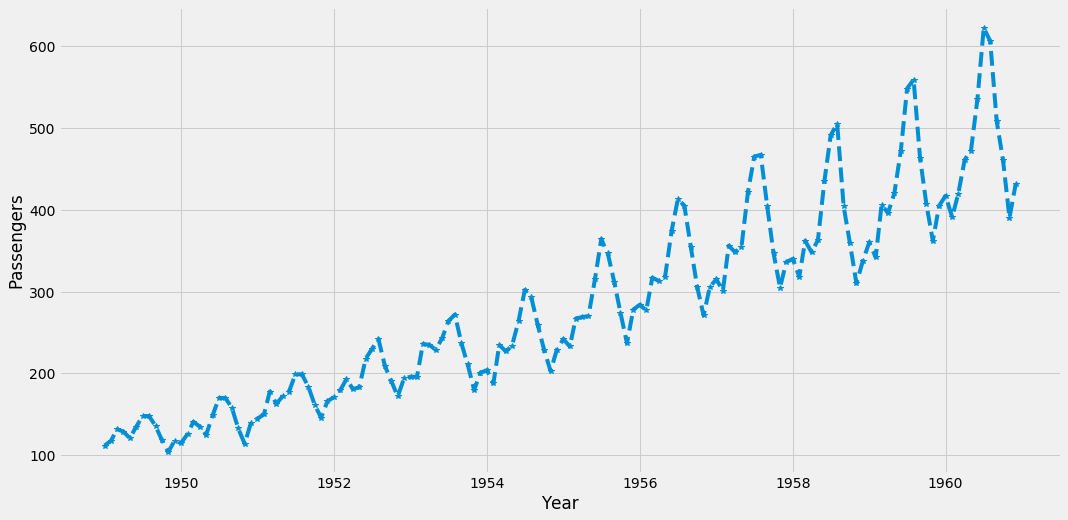

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(passengers.index, passengers.Passengers, '--', marker='*')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

### handling missing data

#### check for missing values

In [30]:
passengers.isnull().sum()

Passengers    0
dtype: int64

There are no missing values in our dataset however, in bid to explain how we handle missing values, we will make a copy of our dataset and delete some values at random.

In [31]:
passengers_cp = passengers.copy()
rows = passengers_cp.sample(frac=.1, random_state=0)
rows['Passengers'] = np.nan
passengers_cp.loc[rows.index, 'Passengers'] = rows.Passengers
passengers_cp.isnull().sum()

Passengers    14
dtype: int64

There are now 14 missing values in the dataset

#### Filling missing data by imputation - Forward fill

In [32]:
passengers_cp_ffill = passengers_cp.fillna(method='ffill')
passengers_cp_ffill.isnull().sum()

Passengers    0
dtype: int64

#### Filling missing data by imputation - Backward fill

In [33]:
passengers_cp_bfill = passengers_cp.fillna(method='bfill')
passengers_cp_bfill.isnull().sum()

Passengers    0
dtype: int64

#### Filling missing data by interpolation

In [34]:
passengers_cp_LIF = passengers_cp.interpolate(method='linear', limit_direction='forward')
passengers_cp_LIF.isnull().sum()

Passengers    0
dtype: int64

In [35]:
passengers_cp_LIB = passengers_cp.interpolate(method='linear', limit_direction='backward')
passengers_cp_LIB.isnull().sum()

Passengers    0
dtype: int64

**Resampling**  is a method of changing the time period of time series observations such that it can be summarised or aggregated. The frequency can either be increased by upsampling or reduced by downsampling.

**Downsampling:**  This reduces the number of samples in the data such that multiple data points are aggregated together. For example, if the temperature in a region is reported every minute and data for the past hour is required, 3600 data points will be obtained. If data for an entire week is needed, 604800 data points will be returned. This becomes quite messy when graphed but can be easily reduced by downsampling. The level of granularity of the original data might not be sensible or informative, because it was sampled too frequently. Additionally, downsampling helps focus on a specific portion of a seasonal cycle by creating subseries for that season. A dataset can match other low-frequency datasets by downsampling.

**Upsampling:**  In contrast to downsampling, upsampling tries to create more data points from infrequent samples, such as changing the time period from minutes to seconds. Although this creates more samples, it does not necessarily add more information to the data. When a time series is irregular, it can be converted to a regular time series by upsampling.

### Downsample to quarterly data points

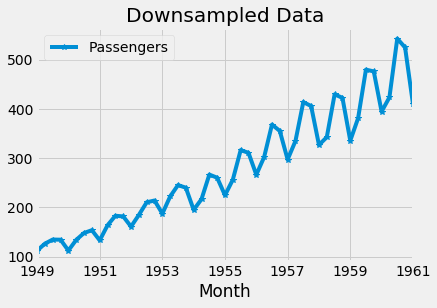

In [42]:
passengers_quaterly = passengers.resample('3M').mean()
passengers_quaterly.plot(marker='*')
plt.title('Downsampled Data')
plt.show()

### Upsample to daily data points

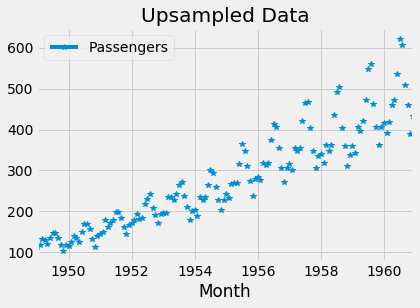

In [41]:
passengers_daily = passengers.resample('D').mean()
passengers_daily.plot(marker='*')
plt.title('Upsampled Data')
plt.show()

## Smoothing Time Series Data

Smoothing is often applied to time series data to help identify patterns better and generally make data more understandable. Irregular roughness is often smoothened out to see clearer signals at lower frequencies by removing higher frequency behaviour. Smoothing can also be described as a preprocessing technique that removes noise from a dataset. There are several time series smoothing techniques, some of which include moving average, exponential smoothing, and Holt’s method.

**Moving average smoothing:**  this is an effective and naive technique that involves determining the weighted averages of observed values, or previous observations surrounding a certain time. A sliding window with a specified window size, known as the window width, is slid across the series to calculate the average values.  It can either be centered where observations before and after time t are used or trailing where observations before or at time t  are used.

In [45]:
passengers_MA = passengers.copy()
MA =passengers_MA.Passengers.rolling(12).mean()
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

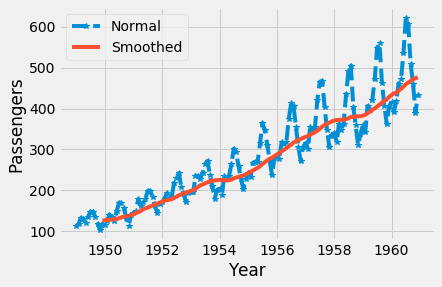

In [46]:
plt.plot(passengers_MA.index, passengers_MA.Passengers, '--', marker='*')
plt.plot(passengers_MA.index, MA)
plt.legend(['Normal', 'Smoothed'])
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

**Exponential smoothing:**  this technique handles various time points differently during smoothing, because more recent data might be more informative. It assigns an exponentially decreasing weights as the observations get older. It can be described as a weighted moving average. There are three major types of exponential smoothing methods, namely: single, double, and triple exponential smoothing. Single exponential smoothing is used for univariate time series data that have no trend or seasonality. The smoothing coefficient (alpha), usually between 0 and 1 is the single parameter required to control the decay and influence of previous observations. On the other hand, double exponential smoothing can be used for univariate time series that have a trend. It includes an additional parameter (beta) that controls the decay of the influence of trend. Finally, the triple exponential smoothing is an extension that can handle univariate time series, that have both trend and seasonality with the inclusion of gamma - a third parameter that controls the influence of seasonality.

## Time Series Specific Exploratory Methods

Exploratory data analysis helps identify patterns and structure in a dataset. It provides an initial understanding of the data and guide towards the first modelling steps. In time series, it is important to identify any seasonality, trend, or stationarity in the series so that the appropriate model can be used to forecast future values.

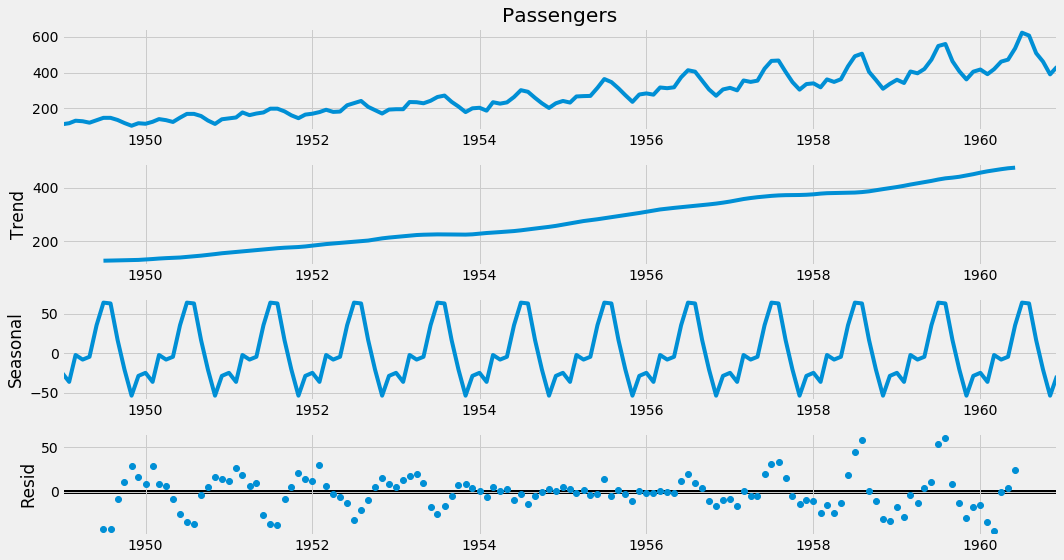

In [48]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(passengers.Passengers, model='additive')
decompose_series.plot()
plt.show()

The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation.

In [52]:
adf_result = adfuller(passengers.Passengers)
print(f"""ADF Statistic: {adf_result[0]}
p-value: {adf_result[1]}
No. of lags used: {adf_result[2]}
No. of observations used: {adf_result[3]}
Critical Values:""")
for k, v in adf_result[4].items():
    print(f'\t{k}: {v}')

ADF Statistic: 0.8153688792060456
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain. This confirms that the series is indeed non-stationary. We will Convert time series to stationary by removing trend and seasonality

### Transformation and Differencing

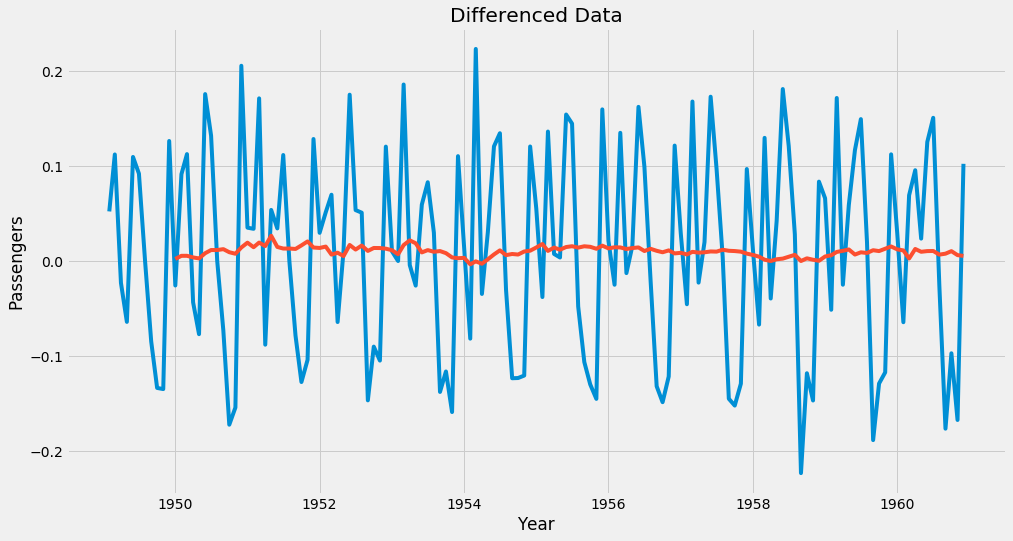

In [53]:
passengers_log = np.log(passengers)
passengers_diff = passengers_log.diff(periods=1)
plt.plot(passengers_diff.index, passengers_diff.Passengers, '-')
plt.plot(passengers_diff.rolling(12).mean())
plt.title('Differenced Data')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()